In [192]:
'Test_Task3_Baby presence detection when covered in blanket or sunscreen'

'Test_Task3_Baby presence detection when covered in blanket or sunscreen'

In [193]:
import gc
gc.collect()

18

In [194]:
%reset -f

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

# Test measurements

In [196]:
import os
import numpy as np
import pandas as pd
# Replace 'your_array_file.npy' with the actual file path of your saved NumPy array
# file_path = 'BabyCovered_with_Blanket_or_Sunscreen_npy_array_Lowpassfiltered_label.npy'

file_path = os.path.join("..", "..", "Data", "Test", "test_BabyCovered_with_Blanket_or_Sunscreen_npy_array_Lowpassfiltered_label.npy")


# Load the NumPy array from the file
loaded_array = np.load(file_path, mmap_mode='r')

# Now 'loaded_array' contains the NumPy array data that was saved in the file
dataframe_testdata = pd.DataFrame(loaded_array,columns=['Frequency','FFT Magnitude','Phase','Infant_Presence'])
#dataframe_testdata = dataframe_testdata.iloc[:2000]
#dataframe_testdata = dataframe_testdata.sample(n=2000, random_state=42)
dataframe_testdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,48274.236998,0.000000,1.0
1,162.760417,24941.596497,-3.088069,1.0
2,325.520833,1716.246635,0.987059,1.0
3,488.281250,759.834659,-1.668255,1.0
4,651.041667,1026.975587,2.278972,1.0
...,...,...,...,...
11995,-813.802083,1362.883093,0.664906,1.0
11996,-651.041667,1026.975587,-2.278972,1.0
11997,-488.281250,759.834659,1.668255,1.0
11998,-325.520833,1716.246635,-0.987059,1.0


In [197]:
num_rows_test = len(dataframe_testdata)
num_rows_test

12000

In [198]:
fft_magnitudes_test = dataframe_testdata["FFT Magnitude"].values  # Convert to NumPy array
fft_magnitudes_test

array([48274.23699804, 24941.59649665,  1716.24663508, ...,
         759.83465866,  1716.24663508, 24941.59649665], shape=(12000,))

In [199]:
fft_frequencies_test = dataframe_testdata["Frequency"].values  # Convert to NumPy array
fft_frequencies_test

array([   0.        ,  162.76041667,  325.52083333, ..., -488.28125   ,
       -325.52083333, -162.76041667], shape=(12000,))

In [200]:
fft_phase_test = dataframe_testdata["Phase"].values  # Convert to NumPy array
fft_phase_test

array([ 0.        , -3.08806921,  0.98705878, ...,  1.66825465,
       -0.98705878,  3.08806921], shape=(12000,))

In [201]:
import numpy as np
from scipy.stats import entropy
from scipy.signal import find_peaks

def extract_features(fft_freqs, fft_mags, fft_phase):
    # Normalize magnitudes to prevent division errors
    norm_mags = fft_mags / np.sum(fft_mags) if np.sum(fft_mags) > 0 else fft_mags
    
    # Spectral Centroid (Weighted Mean of Frequencies)
    spectral_centroid = np.sum(fft_freqs * norm_mags) / np.sum(norm_mags)

    # Spectral Bandwidth (Spread around centroid)
    spectral_bandwidth = np.sqrt(np.sum(norm_mags * (fft_freqs - spectral_centroid) ** 2))

    # Spectral Flatness (Geometric Mean / Arithmetic Mean)
    spectral_flatness = np.exp(np.mean(np.log(fft_mags + 1e-10))) / np.mean(fft_mags + 1e-10)

    # Find peaks in the magnitude spectrum
    peaks, _ = find_peaks(fft_mags, height=0.1 * np.max(fft_mags))  # Adaptive threshold

    # Harmonic Ratio (Ratio of 2nd peak to 1st peak)
    if len(peaks) >= 2:
        harmonic_ratio = fft_mags[peaks[1]] / fft_mags[peaks[0]]
    else:
        harmonic_ratio = 0  # No second peak detected

    # Phase Features
    phase_variance = np.var(fft_phase)  # Variance of phase angles
    phase_mean = np.mean(fft_phase)  # Mean of phase angles
    phase_diff = np.mean(np.diff(fft_phase))  # Average phase difference between frequencies

    return {
        "mean_fft": np.mean(fft_mags),
        "std_fft": np.std(fft_mags),
        "max_fft": np.max(fft_mags),
        "min_fft": np.min(fft_mags),
        "median_fft": np.median(fft_mags),
        "sum_fft": np.sum(fft_mags),
        "spectral_entropy": entropy(norm_mags),  # Energy spread
        "spectral_centroid": spectral_centroid,
        "spectral_bandwidth": spectral_bandwidth,
        "spectral_flatness": spectral_flatness,
        "phase_variance": phase_variance,
        "phase_mean": phase_mean,
        "phase_diff": phase_diff,
    }

In [202]:
# Function to apply perturbation based on reference values
def add_perturbation(reference_features, num_rows, perturb_range=0.03):
    perturbed_data = []
    
    for _ in range(num_rows):
        perturbed_features = {
            key: value * (1 + np.random.uniform(-perturb_range, perturb_range)) 
            for key, value in reference_features.items()
        }
        perturbed_data.append(perturbed_features)
    
    return pd.DataFrame(perturbed_data)

In [203]:
# Extract features for fft_test
reference_features_test = extract_features(fft_frequencies_test, fft_magnitudes_test, fft_phase_test)
reference_features_test

{'mean_fft': np.float64(539.3153031280609),
 'std_fft': np.float64(624.5127144952429),
 'max_fft': np.float64(48274.23699803697),
 'min_fft': np.float64(4.254391050121097),
 'median_fft': np.float64(478.6752374645231),
 'sum_fft': np.float64(6471783.637536731),
 'spectral_entropy': np.float64(9.177761059479113),
 'spectral_centroid': np.float64(-59.48645822846447),
 'spectral_bandwidth': np.float64(567668.4758818537),
 'spectral_flatness': np.float64(0.8096637590819117),
 'phase_variance': np.float64(3.267537662509709),
 'phase_mean': np.float64(2.960594732333751e-17),
 'phase_diff': np.float64(0.0002573605476758946)}

In [204]:
# Generate a DataFrame with perturbed values for all rows in fft_test
num_rows_test = len(dataframe_testdata)
perturbed_test_df = add_perturbation(reference_features_test, num_rows_test, perturb_range=0.03)
perturbed_test_df

,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,523.806598,625.031329,49412.628837,4.374915,467.825947,6.371477e+06,9.131850,-58.291492,570715.449725,0.822573,3.245467,2.885464e-17,0.000251
1,546.402221,606.343078,46951.817964,4.133576,475.817879,6.401399e+06,9.258217,-60.517825,575697.597808,0.795022,3.363192,2.989134e-17,0.000255
2,554.400427,610.571790,48766.950790,4.204833,490.046453,6.298438e+06,9.451906,-60.991828,559686.968664,0.794547,3.226121,2.977324e-17,0.000253
3,543.493498,629.701883,47823.848956,4.330452,472.405735,6.545255e+06,8.928378,-57.889446,567747.395676,0.821496,3.287702,2.915125e-17,0.000258
4,551.444291,640.312078,47502.797625,4.138867,485.277508,6.636932e+06,9.060110,-58.546529,555668.110541,0.829729,3.254759,2.947568e-17,0.000256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,538.915062,634.352445,47838.691566,4.132397,470.285386,6.509875e+06,8.913741,-60.699307,565676.046278,0.824968,3.197892,3.042645e-17,0.000258
11996,525.658062,618.546037,47465.726844,4.137809,471.779244,6.578486e+06,9.290806,-58.611053,562338.904974,0.832281,3.230260,2.910761e-17,0.000263
11997,539.912699,623.494250,48490.680372,4.228552,484.933665,6.298658e+06,9.198740,-59.416840,559584.060964,0.793578,3.340705,2.957193e-17,0.000261
11998,531.047508,613.794489,48697.947967,4.252718,471.880485,6.543440e+06,9.294003,-58.938835,579452.861357,0.818963,3.332153,2.919899e-17,0.000265


In [205]:
dataframe_testdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,48274.236998,0.000000,1.0
1,162.760417,24941.596497,-3.088069,1.0
2,325.520833,1716.246635,0.987059,1.0
3,488.281250,759.834659,-1.668255,1.0
4,651.041667,1026.975587,2.278972,1.0
...,...,...,...,...
11995,-813.802083,1362.883093,0.664906,1.0
11996,-651.041667,1026.975587,-2.278972,1.0
11997,-488.281250,759.834659,1.668255,1.0
11998,-325.520833,1716.246635,-0.987059,1.0


In [206]:
len(perturbed_test_df),len(dataframe_testdata)

(12000, 12000)

In [207]:
# Ensure both DataFrames have the same number of rows
if len(dataframe_testdata) != len(perturbed_test_df):
    print("The DataFrames have different lengths. Adjust them to have the same number of rows before concatenating.")
else:
    # Concatenate the DataFrames side by side
    dataframe_testdata_withfeatures = pd.concat([dataframe_testdata, perturbed_test_df], axis=1)

# Display the first few rows of the updated dataframe_testdata to verify
dataframe_testdata_withfeatures.head()

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,48274.236998,0.000000,1.0,523.806598,625.031329,49412.628837,4.374915,467.825947,6.371477e+06,9.131850,-58.291492,570715.449725,0.822573,3.245467,2.885464e-17,0.000251
1,162.760417,24941.596497,-3.088069,1.0,546.402221,606.343078,46951.817964,4.133576,475.817879,6.401399e+06,9.258217,-60.517825,575697.597808,0.795022,3.363192,2.989134e-17,0.000255
2,325.520833,1716.246635,0.987059,1.0,554.400427,610.571790,48766.950790,4.204833,490.046453,6.298438e+06,9.451906,-60.991828,559686.968664,0.794547,3.226121,2.977324e-17,0.000253
3,488.281250,759.834659,-1.668255,1.0,543.493498,629.701883,47823.848956,4.330452,472.405735,6.545255e+06,8.928378,-57.889446,567747.395676,0.821496,3.287702,2.915125e-17,0.000258
4,651.041667,1026.975587,2.278972,1.0,551.444291,640.312078,47502.797625,4.138867,485.277508,6.636932e+06,9.060110,-58.546529,555668.110541,0.829729,3.254759,2.947568e-17,0.000256


In [208]:
len(dataframe_testdata)

12000

# Testing the Random Forest Model

In [209]:
# dropping features

In [210]:
to_drop = {'median_fft', 'phase_mean', 'min_fft', 'max_fft', 'sum_fft', 'spectral_centroid', 'spectral_entropy', 'mean_fft', 'std_fft', 'phase_diff'}
test_X = dataframe_testdata_withfeatures.drop(columns=['Infant_Presence'])  # Features
test_y = dataframe_testdata_withfeatures['Infant_Presence']  # Labels
test_x_dataset_1_reduced = test_X.drop(columns=to_drop)

In [211]:
test_x_dataset_1_reduced

,Frequency,FFT Magnitude,Phase,spectral_bandwidth,spectral_flatness,phase_variance
0,0.000000,48274.236998,0.000000,570715.449725,0.822573,3.245467
1,162.760417,24941.596497,-3.088069,575697.597808,0.795022,3.363192
2,325.520833,1716.246635,0.987059,559686.968664,0.794547,3.226121
3,488.281250,759.834659,-1.668255,567747.395676,0.821496,3.287702
4,651.041667,1026.975587,2.278972,555668.110541,0.829729,3.254759
...,...,...,...,...,...,...
11995,-813.802083,1362.883093,0.664906,565676.046278,0.824968,3.197892
11996,-651.041667,1026.975587,-2.278972,562338.904974,0.832281,3.230260
11997,-488.281250,759.834659,1.668255,559584.060964,0.793578,3.340705
11998,-325.520833,1716.246635,-0.987059,579452.861357,0.818963,3.332153


In [212]:
test_y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11995    1.0
11996    1.0
11997    1.0
11998    1.0
11999    1.0
Name: Infant_Presence, Length: 12000, dtype: float64

In [213]:
import os 
import joblib

# Load the trained Random Forest model
# clf = joblib.load('random_forest_model_Baby_Covered_in_Blanket_Sunscreen.pkl')

# Define path (adjust as needed)
model_dir = os.path.join("..", "..", "Models", "Baby Detection and Seat Classification Random Forest")
model_path = os.path.join(model_dir, "random_forest_model_Baby_Covered_in_Blanket_Sunscreen.pkl")

# Load the trained Random Forest model
clf = joblib.load(model_path)

# Example: Transform new data and make predictions
y_pred = clf.predict(test_x_dataset_1_reduced)
y_pred

array([0., 0., 1., ..., 1., 0., 0.], shape=(12000,))

In [214]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: More detailed report
print("\nClassification Report:")
print(classification_report(test_y, y_pred,zero_division=0))

# Optional: Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, y_pred))


Accuracy: 0.6666

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.67      0.80     12000

    accuracy                           0.67     12000
   macro avg       0.50      0.33      0.40     12000
weighted avg       1.00      0.67      0.80     12000


Confusion Matrix:
[[   0    0]
 [4001 7999]]


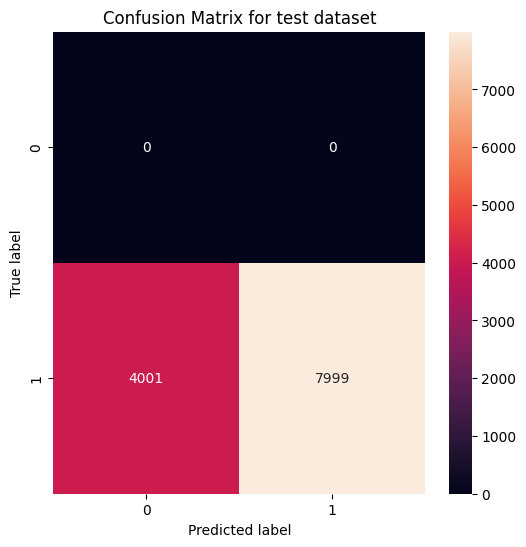

In [215]:
# Generate confusion matrix
cm = confusion_matrix(test_y, y_pred)
cm

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix for test dataset')
plt.show()

# Testing with XG Boost model task 3

In [216]:
import os
import xgboost as xgb
import joblib


# Define paths
model_dir = os.path.join("..", "..", "Misc")
scalar_dir = os.path.join("..", "..", "Models", "Baby Detection and Seat Classification XGBoost")


# Model and scaler file paths
model_path = os.path.join(model_dir, "xgboost_model_Baby_Covered_in_Blanket_Sunscreen.json")
scaler_path = os.path.join(scalar_dir, "xgboost_scaler_Baby_Covered_in_Blanket_Sunscreen.pkl")

# Load the trained XGBoost model
clf = xgb.XGBClassifier()
clf.load_model(model_path)


# Load the scaler
scaler = joblib.load(scaler_path)

print(f"Model loaded from: {os.path.abspath(model_path)}")
print(f"Scaler loaded from: {os.path.abspath(scaler_path)}")

# Transform test data
X_new_scaled = scaler.transform(test_x_dataset_1_reduced)

# Predict
y_pred = clf.predict(X_new_scaled)
y_pred

Model loaded from: /Users/mandarkale/Documents/MyProjects/MachineLearning/FIUS_Based_Infant_Presence_Detection_in_Car_Seats/source_code/Misc/xgboost_model_Baby_Covered_in_Blanket_Sunscreen.json
Scaler loaded from: /Users/mandarkale/Documents/MyProjects/MachineLearning/FIUS_Based_Infant_Presence_Detection_in_Car_Seats/source_code/Models/Baby Detection and Seat Classification XGBoost/xgboost_scaler_Baby_Covered_in_Blanket_Sunscreen.pkl


array([0, 0, 1, ..., 1, 0, 0], shape=(12000,))

In [217]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: More detailed report
print("\nClassification Report:")
print(classification_report(test_y, y_pred,zero_division=0))

# Optional: Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, y_pred))


Accuracy: 0.6936

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.69      0.82     12000

    accuracy                           0.69     12000
   macro avg       0.50      0.35      0.41     12000
weighted avg       1.00      0.69      0.82     12000


Confusion Matrix:
[[   0    0]
 [3677 8323]]


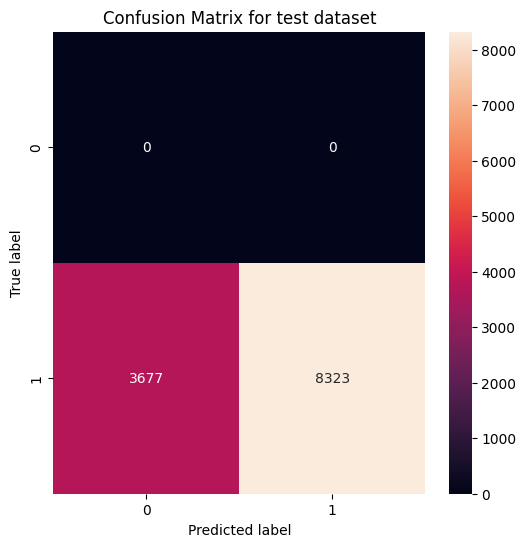

In [218]:
# Generate confusion matrix
cm = confusion_matrix(test_y, y_pred)
cm

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix for test dataset')
plt.show()